# ПОСТРОЕНИЕ КЛАССИФИФИКАТОРА ДИАБЕТА У ПАЦИЕНТА. 

## <u>Задание 1. Подготовка и анализ данных</u>


### <u>1. Изучение структуры и основной статистики по данным</u>

___Настройка окружения для работы___

 Для выполнения проекта необходимы следующие библиотеки и программное обеспечение:  
- Python 3.12+;  
- Jupyter Notebook;  
- NumPy;  
- Pandas;  
- Matplotlib;  
- Sklearn.  

In [5]:
import sys
print(sys.version)

3.12.9 (main, Mar 25 2025, 16:37:06) [Clang 16.0.0 (clang-1600.0.26.4)]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

<div class="alert alert-block alert-success">
    <b>Окружение для выполнения проекта настроено</b>
</div>

### Загрузка датасета

Загрузка данных и вывод первых 5 строк датасета

In [12]:
df = pd.read_csv("/Users/vasilkowa/Desktop/school/AI_ITS_01-1/src/diabetes.csv")
print(pd.read_csv("/Users/vasilkowa/Desktop/school/AI_ITS_01-1/src/diabetes.csv").head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


___Получение основной информации о датасете___

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


___Получение описательной статистики датасета___

In [14]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### Описание данных

___Количество строк в датасете:___ 768 (начало от 0 до 767), каждая строка содержит информацию для одного человека с признаками, харакатеризующими его здоровье    
___Количество столбцов:___ 9, где каждому столбцу соответствуют различные характеристики состояния здоровья  

___Ячейки:___  
___1. Pregnancies:___ количество беременностей, целочисленный тип данных, пропусков нет.
  - Среднее: 3.85 — в среднем женщины в этом датасете имеют около 3-4 беременностей.  
  - Стандартное отклонение: 3.37 — значения сильно варьируются.  
  - Минимум: 0 — записи о женщинах без беременности.  
  - Максимум: 17 — самая высокая зафиксированная степень беременности.  
  - 25%: 1 — 25% женщин имели одну беременность.  
  - 50%: 3 — медиана, 50% женщин имели до 3-х беременностей.  
  - 75%: 6 — 75% женщин имели до 6 беременностей.

___2. Glucose:___ уровень глюкозы в крови, целочисленный тип данных, пропусков нет, но есть нулевые значения.  
  - Среднее: 120.89 — в среднем уровень глюкозы в крови около 120.
  - Стандартное отклонение: 31.97 — есть довольно значительные колебания в уровнях глюкозы.
  - Минимум: 0 — возможно, есть записи с нулевым уровнем глюкозы, что может указывать на ошибочные или отсутствующие данные.
  - Максимум: 199.
  - 25%: 99 — 25% людей имеют уровень глюкозы ниже 99.
  - 50%: 117 — медиана, 50% имеют уровень глюкозы до 117.
  - 75%: 140.25 — 75% имеют уровень глюкозы до 140.

___3. BloodPressure:___ уровень артериального давления, целочисленный тип данных, пропусков нет, но есть нулевые значения.  
  - Среднее: 69.11 — средний показатель артериального давления.
  - Стандартное отклонение: 19.36 — значительная вариативность.
  - Минимум: 0 — есть записи с нулевыми значениями, что невозможно.  
  - Максимум: 122.
  - 25%: 62 — 25% людей имеют давление ниже 62.
  - 50%: 72 — медиана, половина людей имеют давление до 72.
  - 75%: 80 — 75% людей имеют давление ниже 80.

___4. SkinThickness:___ толщина кожной складки на трицепсе, целочисленный тип данных, пропусков нет, но есть нулевые значения.    
  - Среднее: 20.54.
  - Стандартное отклонение: 15.95 — высокое отклонение, что может свидетельствовать о различии в способах измерения.
  - Минимум: 0 — возможно, некоторые значения являются ошибочными или отсутствуют.
  - Максимум: 99.
  - 25%: 0 — 25% людей имеют толщину кожи, равную нулю (или ошибочные данные).
  - 50%: 23 — медиана, половина людей имеет толщину кожи до 23.
  - 75%: 32 — 75% людей имеют толщину кожи до 32.

___5. Insulin:___ уровень инсулина, целочисленный тип данных, пропусков нет, но есть нулевые значения.  
  - Среднее: 79.80.
  - Стандартное отклонение: 115.24 — значительная вариативность.
  - Минимум: 0 — возможно, некоторые значения являются ошибочными или отсутствуют.
  - Максимум: 846.
  - 25%: 0 — 25% людей имеют уровень инсулина равный нулю.  
  - 50%: 30.5 — медиана, половина людей имеет уровень инсулина до 30.5.  
  - 75%: 127.25 — 75% людей имеют уровень инсулина ниже 127.25.

___6. BMI:___ индекс массы тела, тип данных с плавающей точкой, пропусков нет, но есть нулевые значения.  
  - Среднее: 31.99 - соответствует избыточному весу по классификации ВОЗ.  
  - Стандартное отклонение: 7.88 — есть большая вариативность значений.  
  - Минимум: 0 — возможно, есть ошибочные или отсутствующие данные.  
  - Максимум: 67.1.  
  - 25%: 27.3 — 25% людей имеют BMI ниже 27.3.  
  - 50%: 32 — медиана, половина людей имеет BMI до 32.  
  - 75%: 36.6 — 75% людей имеют BMI ниже 36.6.

___7. DiabetesPedigreeFunction:___ наследственная предрасположенность к возникновению диабета, тип данных с плавающей точкой, пропусков нет.   
  - Среднее: 0.47.  
  - Стандартное отклонение: 0.33 — значительные различия в данных.  
  - Минимум: 0.078.  
  - Максимум: 2.42.  
  - 25%: 0.24 — 25% людей имеют значение ниже 0.24.  
  - 50%: 0.37 — медиана, половина людей имеют показатель ниже 0.37.  
  - 75%: 0.63 — 75% людей имеют показатель ниже 0.63.

___8. Age:___ возраст, целочисленный тип данных, пропусков нет.  
  - Среднее: 33.24 — средний возраст людей в этом датасете.  
  - Стандартное отклонение: 11.76 — разнообразие возрастов.  
  - Минимум: 21 год.  
  - Максимум: 81 год.  
  - 25%: 24 — 25% людей моложе 24 лет.  
  - 50%: 29 — медиана, половина людей моложе 29 лет.  
  - 75%: 41 — 75% людей моложе 41 года.

___9. Outcome:___ наличие или отсутствие диабета (0 - нет, 1 - есть).   
  - Среднее: 0.35 — 35% людей в датасете.  
  - Стандартное отклонение: 0.48 — значительное отклонение.  
  - Минимум: 0 — люди, не болеющие диабетом.  
  - Максимум: 1 — люди, больные диабетом.  
  - 25%: 0 — 25% людей не болеют диабетом.  
  - 50%: 0 — медиана, половина людей не болеют диабетом.  
  - 75%: 1 — 75% людей больны диабетом.  

___Проверка дублированных строк:___

In [15]:
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 0


___Проверка наличия пропущенных значений, требующих обработки:___

In [16]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    print(f"{column}: {df[column].value_counts().get(0, 0)} нулевых значений")

for column in columns_to_check:
    median = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median)

Glucose: 5 нулевых значений
BloodPressure: 35 нулевых значений
SkinThickness: 227 нулевых значений
Insulin: 374 нулевых значений
BMI: 11 нулевых значений


Поиск нулевых значений в тех столбцах, где 0 является аномальным. После обнаружения нулевых значений для более точной картины данных необходима обработка всех 0. (В данном случае вывод уже не содержит нулевые значения в силу последующей их обработки. Изначально по столбцам нулевые значения имелись). 

В данном случае все нулевые значения заменены медианными значениями по каждому столбцу. 

___Итоговая проверка аномальных нулевых значений:___

In [17]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    print(f"{column}: {df[column].value_counts().get(0, 0)} нулевых значений")

Glucose: 0 нулевых значений
BloodPressure: 0 нулевых значений
SkinThickness: 0 нулевых значений
Insulin: 0 нулевых значений
BMI: 0 нулевых значений


___Поиск выбросов:___

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Pregnancies                   4
Glucose                       0
BloodPressure                14
SkinThickness                87
Insulin                     346
BMI                           8
DiabetesPedigreeFunction     29
Age                           9
Outcome                       0
dtype: int64


___Проверка на выбросы:___  
Отображаем по 4 боксплота на строке (последний столбец Outcome не учитываем).  
Для каждого признака строим отдельный боксплот, задаем название и убираем подпись по оси Х.  
Задаем название для всей фигуры и автоматичсеки распределяем отступы во избежание перекрытия фигур. 

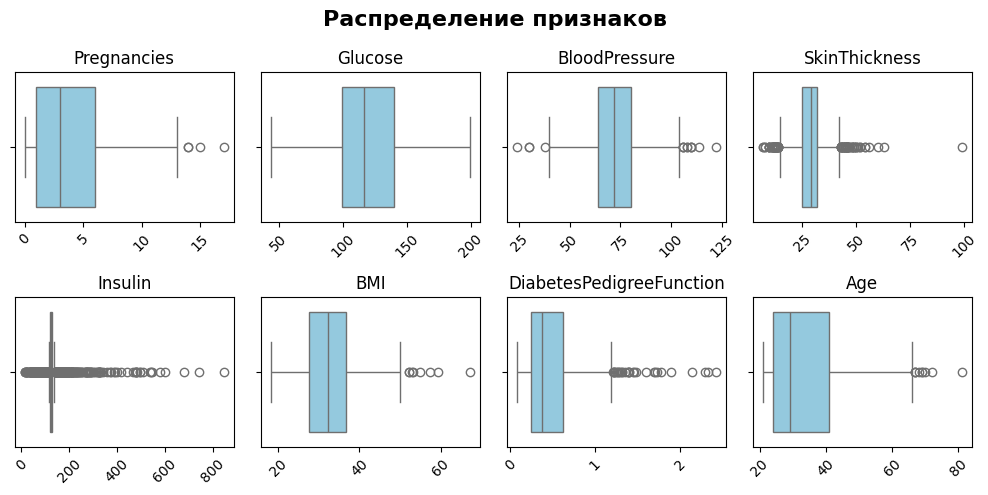

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
axes = axes.flatten()
columns = df.columns[:-1]

for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i], color="skyblue", fliersize=6)
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set(xlabel=None)
    
fig.suptitle("Распределение признаков", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()


___Распределения по колонкам у разных классов целевого признака:___

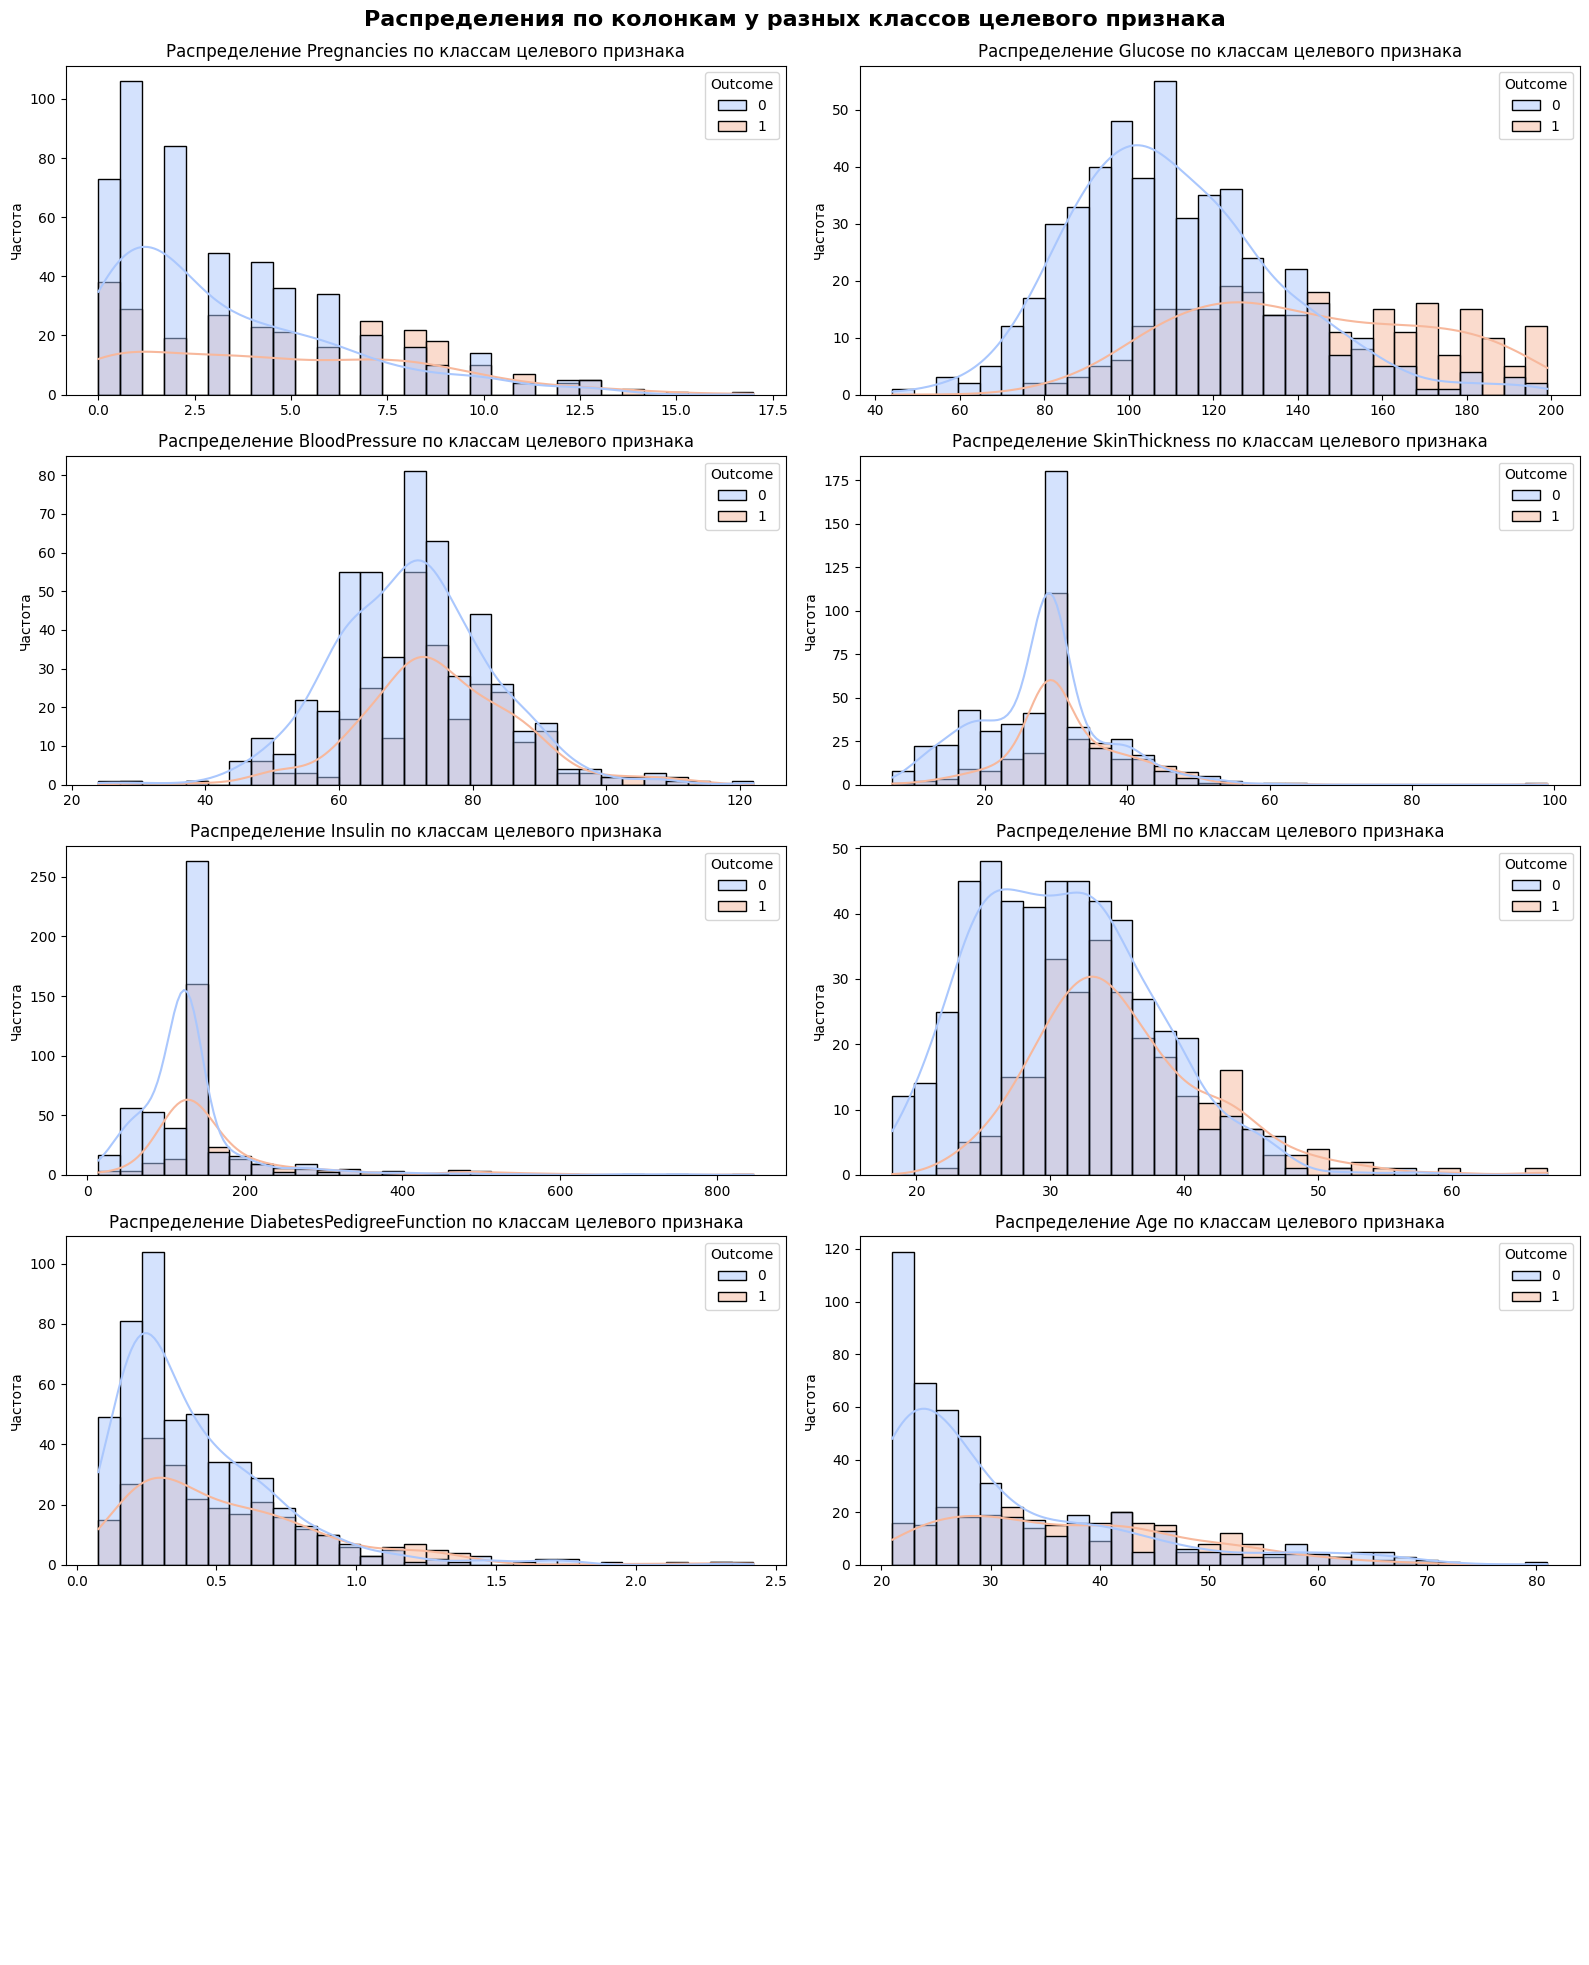

In [20]:
ncols = 2 
nrows = (len(df.columns) - 1) // ncols + 1 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]): 
    sns.histplot(data=df, x=column, hue="Outcome", kde=True, bins=30, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f'Распределение {column} по классам целевого признака', fontsize=12)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Частота')


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Распределения по колонкам у разных классов целевого признака\n", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


___Попарное сравнение признаков (построение тепловой карты корреляций):___

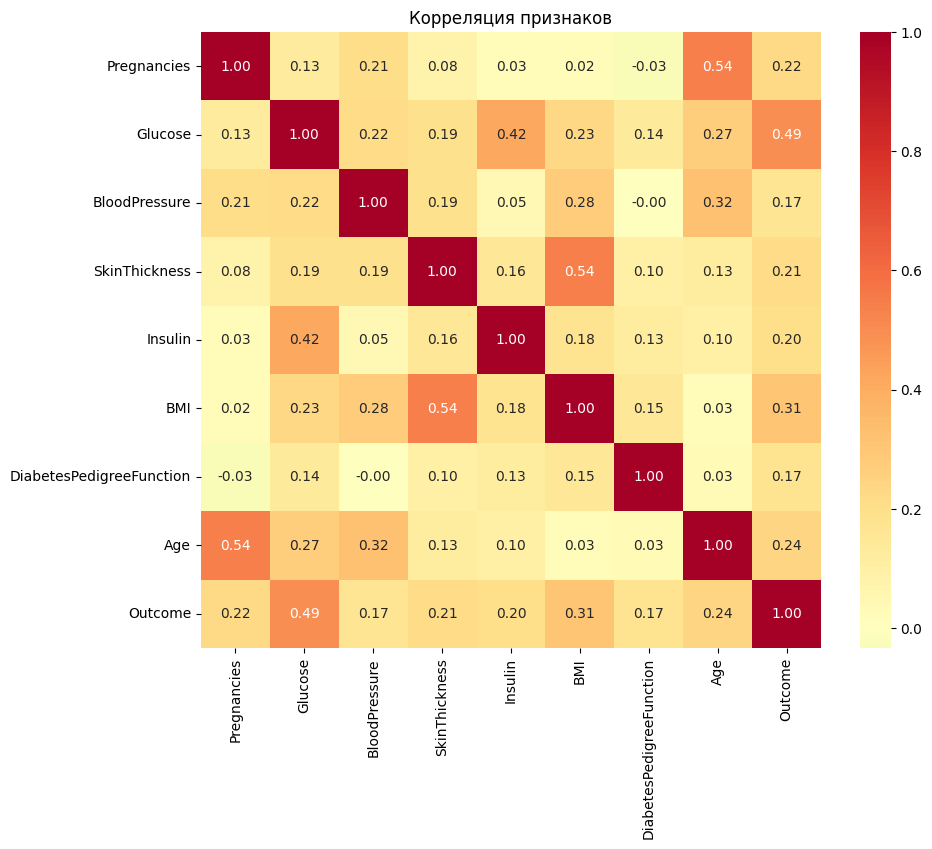

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn_r", center=0, fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

### Итоговое описание признаков и аномалий

***Pregnancies***  - количество беременностей, которые были у женщины. 
Данные варьируются от 0 до 17. Наблюдаются высокие значения (например, 17), которые могут быть аномальными для общего населения, но возможны для отдельных групп.

***Glucose*** - уровень глюкозы в плазме крови натощак (в мг/дл).  
Значения 0 встречаются, что невозможно для глюкозы (в норме 70–100 мг/дл)

***BloodPressure*** - диастолическое давление в мм рт. ст.   
Значения 0 встречаются, что невозможно для реального давления. Также есть значения выше нормы (122 мм рт. ст.), что может быть связано с гипертонией.

***SkinThickness*** - измерение толщины кожной складки на трицепсе (в мм), использующееся для оценки подкожного жира.  
Значения 0 встречаются часто, что невозможно для реальной толщины складки. Максимальное значение (99 мм) выглядит высоким и может быть аномалией (сильное различие между минимальными и максимальными значениями).

***Insulin*** - уровень инсулина в сыворотке крови натощак (в мкЕд/мл).  
Значения 0 встречаются часто, что невозможно для реального уровня инсулина. Максимальное значение (846) кажется экстремальным (сильное различие между минимальными и максимальными значениями) и может быть ошибкой или редким случаем.

***BMI*** -индекс массы тела, рассчитанный как вес (кг) / (рост в метрах)^2.  
Значения 0 встречаются часто, что невозможно для реального индекса массы тела. Среднее значение (31.99) говорит о том, что большинство участников страдают избыточным весом или ожирением.

***DiabetesPedigreeFunction*** - оценка вероятности развития диабета на основе генетической предрасположенности.  
Нет очевидных аномалий. Значения варьируются от 0.07 до 2.42, где более высокие значения говорят о большей предрасположенности.

***Age*** - возраст участников (в годах).
Возрастной диапазон от 21 до 81 года, нет пациентов младшей возрастной группы. Иных аномалий не наблюдается.

***Outcome*** - целевой признак, где 0 – отсутствие диабета, 1 – наличие диабета.  
Среднее значение (0.35) показывает, что только 35% участников имеют диабет. Это говорит о дисбалансе классов, который нужно учитывать при анализе и построении моделей.


Наиболее значимая положительная корреляция с целевым признаком ***Outcome***:  
- ___Glucose___ (сильная корреляция, значение  0.49)  
- ___BMI___ (умеренная положительная корреляция, значение 0.31)  
- ___Age___ (умеренная положительная корреляция, значение 0.24)  

Низкая корреляция или её отсутствие у признаков, таких как BloodPressure и SkinThickness.  

Признаки с наибольшей корреляцией с Outcome являются наиболее важными предикторами для предсказания диабета. Однако высокая корреляция между независимыми признаками требует проверки на мультиколлинеарность.

### <u>2. Разделение датасета на обучающий и тестовый.</u>

Для разделения на тестовый и обучающий наборы можно принять <u>признаки за __X__</u>, а <u>целевой признак за __у__</u>. 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающего набора X: {X_train.shape}")
print(f"Размер тестового набора X: {X_test.shape}")
print(f"Размер обучающего набора y: {y_train.shape}")
print(f"Размер тестового набора y: {y_test.shape}")

Размер обучающего набора X: (614, 8)
Размер тестового набора X: (154, 8)
Размер обучающего набора y: (614,)
Размер тестового набора y: (154,)


### <u>3. Нормализация данных.</u>

In [25]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


Признаки масштабированы, отрицательные значения в данном случае являются вариантом нормы. 

Можно также проверить нормализацию данных: среднее значение каждого признака должно быть приближено к нулю, а стандартное отклонение - к 1. 

In [148]:
print("Среднее значение для каждого признака:\n", np.mean(X_scaled, axis=0))  
print("\nСтандартное отклонение для каждого признака:\n", np.std(X_scaled, axis=0))

Среднее значение для каждого признака:
 [-6.47630098e-17  4.62592927e-18  5.78241159e-18 -1.52655666e-16
  1.50342701e-17  2.61365004e-16  2.45174251e-16  1.93132547e-16]

Стандартное отклонение для каждого признака:
 [1. 1. 1. 1. 1. 1. 1. 1.]


<div class="alert alert-block alert-success">
    <b>Нормализация данных прошла успешно.</b>
</div>

## <u>Задание 2. Создание и обучение моделей машинного обучения</u>

### <u>1. Выбор модели и ее обучение.</u>

___1) Naive Bayes___

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [27]:
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели Naive Bayes: {accuracy:.4f}")
print("\nПолный отчёт о классификации:\n", classification_report(y_test, y_pred))

Точность модели Naive Bayes: 0.7532

Полный отчёт о классификации:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Общая точность 75%, что не идеально. Отсутствие диабета предсказывается лучше, чем его наличие. 

___2) SVC___

In [28]:
from sklearn.svm import SVC

In [29]:
svc_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



Общая точность 77%, что не идеально. Отсутствие диабета предсказывается лучше, чем его наличие, плохо справляется с выявлением больных диабетом. 

___3) Random Forest___

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Общая точность 75%, что не идеально. Отсутствие диабета предсказывается лучше, чем его наличие, модель делает много ложных срабатываний и не находит 33% реальных больных

___Общий вывод по всем моделям___

In [32]:
from sklearn.tree import DecisionTreeClassifier

nb = GaussianNB()
svc = SVC(kernel='linear', random_state=42)

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

models = {'Naive Bayes': nb, 'SVC': svc, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Модель: {name}")
    print(classification_report(y_test, y_pred))
    print('-' * 50)


Модель: Naive Bayes
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

--------------------------------------------------
Модель: SVC
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

--------------------------------------------------
Модель: Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy              

### <u>2. Изменение параметров моделей (GridSearch из sklearn)</u>

___1) Naive Bayes___

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]  # Степень сглаживания
}


grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_nb.fit(X_train, y_train)

print("Лучшие параметры для Naive Bayes:", grid_nb.best_params_)
print("Лучшая точность:", grid_nb.best_score_)



Fitting 3 folds for each of 7 candidates, totalling 21 fits
Лучшие параметры для Naive Bayes: {'var_smoothing': 0.001}
Лучшая точность: 0.7410250278973378


___2) SVC___

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale']
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svc.fit(X_train, y_train)

print("Лучшие параметры для SVC:", grid_svc.best_params_)
print("Лучшая точность:", grid_svc.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Лучшие параметры для SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Лучшая точность: 0.7703411445879165


___3) Desicion tree___

In [35]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Лучшие параметры для Decision Tree:", grid_dt.best_params_)
print("Лучшая точность:", grid_dt.best_score_)



Лучшие параметры для Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучшая точность: 0.7556977209116353


___4) Random Forest___

In [40]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Лучшие параметры для Random Forest:", grid_rf.best_params_)
print("Лучшая точность:", grid_rf.best_score_)



Лучшие параметры для Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Лучшая точность: 0.7785552445688391


### <u>3. Обучение на лучших параметрах.</u>

___1) Naive Bayes___

In [36]:
best_nb = GaussianNB(var_smoothing=grid_nb.best_params_['var_smoothing'])
best_nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.001)

___2) SVC___

In [37]:
best_svc = SVC(**grid_svc.best_params_)
best_svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

___3) Desicion tree___

In [38]:
best_dt = DecisionTreeClassifier(**grid_dt.best_params_)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)

___4) Random Forest___

In [41]:
best_rf = RandomForestClassifier(**grid_rf.best_params_)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

## <u>Задание 3. Оценка качества модели</u>

### <u>1. Проверка моделей на тестовых выборках.</u>

In [135]:
y_pred_nb = best_nb.predict(X_test)
y_pred_svc = best_svc.predict(X_test)
y_pred_dt = best_dt.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

print("Accuracy Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Classification Report Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("-"*55)
print("Accuracy SVC:", accuracy_score(y_test, y_pred_svc))
print("Classification Report SVC:\n", classification_report(y_test, y_pred_svc))
print("-"*55)
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification Report Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("-"*55)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred_rf))


Accuracy Naive Bayes: 0.7402597402597403
Classification Report Naive Bayes:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

-------------------------------------------------------
Accuracy SVC: 0.7597402597402597
Classification Report SVC:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

-------------------------------------------------------
Accuracy Decision Tree: 0.7207792207792207
Classification Report Decision Tree:
               p

### <u>2. Интерпретация полученных результатов.</u>

### Итоговые выводы  

#### **Naive Bayes (Accuracy: 74%)**  
**Плюсы:** Хорошо определяет отсутствие диабета (`0`).  
**Минусы:** Плохо выявляет случаи диабета (`1`) – precision **63%**, recall **65%**.  
**Вывод:** модель не очень подходит, так как часто пропускает больных пациентов.  

---

#### **SVC (Accuracy: 76%)**  
**Плюсы:** Лучше, чем Naive Bayes, но всё ещё слабо определяет диабет (precision **67%**, recall **64%**).  
**Минусы:** Хорошо выявляет здоровых (`0`), но пропускает больных (`1`).  
**Вывод:** можно улучшить с помощью балансировки классов или настройки гиперпараметров.  

---

#### **Decision Tree (Accuracy: 72%)**  
**Плюсы:** Часто определяет диабет (`1`), но делает много ложных срабатываний (precision **58%**, recall **76%**).  
**Минусы:** Высокий recall означает, что модель часто ошибочно ставит диагноз.  
**Вывод:** потенциал есть, но требуется ограничение глубины дерева или использование ансамблей.  

---

#### **Random Forest (Accuracy: 78%)**  
**Плюсы:** Лучшая модель среди всех протестированных. Наиболее сбалансированные precision и recall для диабета (`1`) – **69%**/**69%**.  
**Минусы:** Всё ещё ниже 80% accuracy, есть пространство для улучшения.  
**Вывод:** перспективный вариант, можно улучшить настройкой гиперпараметров (`n_estimators`, `max_depth`) или использовать бустинг.  

---

### **Общий вывод**  
- **Лучше всего справляется Random Forest**, но точность пока не достигает 80%.  
- **Главная проблема – низкий recall для диабета (`1`), что приводит к пропуску больных пациентов.**  
- **Возможные пути улучшения:**  
  - **Балансировка классов** (oversampling больных или undersampling здоровых).  
  - **Использование более мощных моделей** (например, Gradient Boosting – XGBoost, LightGBM).  
  - **Оптимизация гиперпараметров** Random Forest (увеличение `n_estimators`, уменьшение `max_depth`).  
